<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
label
ham     4825
spam     747
Name: count, dtype: int64


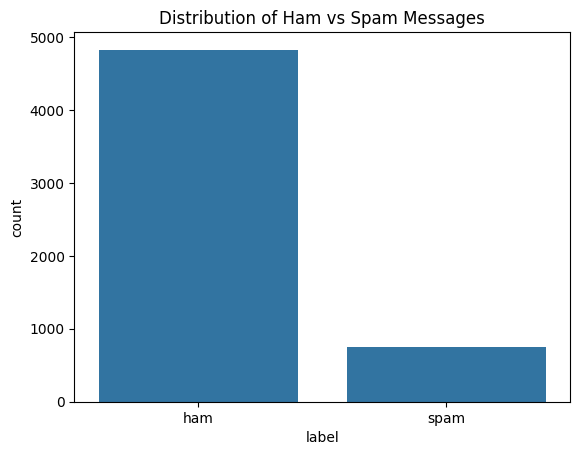

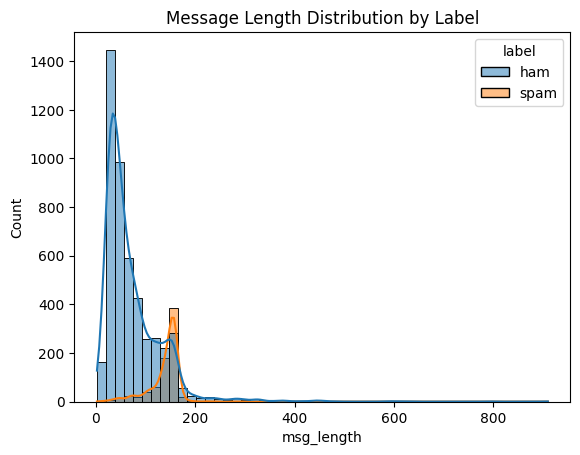

Accuracy: 0.9748878923766816

Classification Report:
               precision    recall  f1-score   support

         ham       0.99      0.98      0.99       966
        spam       0.90      0.92      0.91       149

    accuracy                           0.97      1115
   macro avg       0.94      0.95      0.95      1115
weighted avg       0.98      0.97      0.98      1115


Confusion Matrix:
 [[950  16]
 [ 12 137]]
Prediction: SPAM
✅ Model and vectorizer saved successfully!


In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

df=pd.read_csv('SMSSpamCollection',encoding='latin-1',sep='\t',names=['label','message'])

df.head()

df.info()
df['label'].value_counts()

print(df['label'].value_counts())
sns.countplot(x='label', data=df)
plt.title("Distribution of Ham vs Spam Messages")
plt.show()

# Message length analysis
df['msg_length'] = df['message'].apply(len)
sns.histplot(data=df, x='msg_length', hue='label', bins=50, kde=True)
plt.title("Message Length Distribution by Label")
plt.show()

df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})

X = df['message']
y = df['label_num']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(
    stop_words='english',
    ngram_range=(1, 2),   # word + bi-gram
    min_df=2,
    max_df=0.95
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['ham','spam']))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

new_sms = ["Congratulations! You have won a free ticket!"]
new_vec = tfidf.transform(new_sms)
prediction = model.predict(new_vec)
print("Prediction:", "SPAM" if prediction[0]==1 else "HAM")

import joblib
joblib.dump(model, 'spam_model.pkl')
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

import pickle

# Save the TF-IDF Vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)

# Save the trained model
with open('spam_model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("✅ Model and vectorizer saved successfully!")